##**BIBLIOTECAS**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


#Lendo os arquivos


In [2]:
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding='latin-1')

In [3]:
clientes = pd.DataFrame(pd.read_excel('dados_clientes.xlsx'))

In [4]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding='latin-1')

In [5]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [6]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [7]:
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


# INFORMAÇÕES DOS DADOS

In [8]:
clientes.info()
idade.info()
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        2

In [9]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [10]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


# **DADOS NULOS**

Onde tem campos em branco:

In [11]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [12]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [13]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

Os campos em branco

In [14]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [15]:
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


Apagando as células que tenham campos em branco

In [16]:
clientes.dropna(subset=['peso'], inplace=True)

In [17]:
estados.dropna(subset=['pais'], inplace=True)

#Conferindo se deu certo a exclusão

In [18]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [19]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

#Gráfico **BINS**

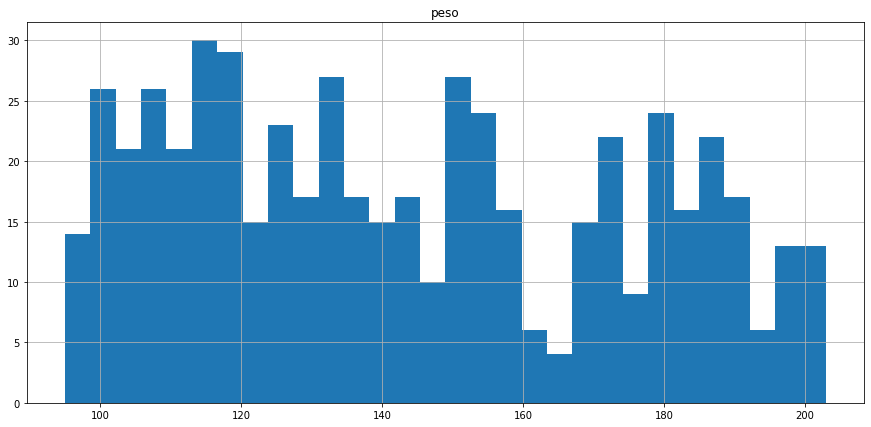

In [20]:
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

#Junção dos Dados para a BASE COMPLETA

In [21]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')
base_completa = pd.merge(clientes_estados, idade, on= 'id_cliente').sort_values('id_cliente')
base_completa.reset_index(drop=True)
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [22]:
cliente_estados = pd.merge(clientes, estados, on='id_estado')

In [23]:
cliente_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil


In [24]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,57


#TESTES

In [25]:
base_completa.isna().sum()

id_cliente      0
peso            0
colesterol      0
genero          0
id_estado       0
estado          0
sigla_estado    0
pais            0
idade           0
dtype: int64

In [26]:
Colesterol = base_completa.colesterol.mean()

In [27]:
print(f'colesterol {Colesterol}')

colesterol 170.48192771084337


#APLICANDO O METODO COTOVELO

In [28]:
from sklearn.cluster import KMeans

In [29]:
testePxC = base_completa.iloc[:,[1,2]].values
print(f'o valor do testePxC é: {testePxC}')

o valor do testePxC é: [[102. 111.]
 [115. 135.]
 [115. 136.]
 [130. 158.]
 [198. 227.]
 [114. 131.]
 [145. 176.]
 [191. 223.]
 [186. 221.]
 [104. 116.]
 [188. 222.]
 [ 96. 102.]
 [156. 192.]
 [125. 152.]
 [178. 213.]
 [109. 125.]
 [168. 204.]
 [152. 189.]
 [133. 163.]
 [153. 189.]
 [107. 122.]
 [199. 228.]
 [140. 168.]
 [ 95. 102.]
 [183. 218.]
 [108. 123.]
 [190. 222.]
 [174. 208.]
 [149. 183.]
 [169. 204.]
 [138. 167.]
 [151. 188.]
 [178. 213.]
 [106. 122.]
 [195. 225.]
 [ 96. 105.]
 [129. 155.]
 [166. 203.]
 [197. 225.]
 [148. 177.]
 [117. 139.]
 [193. 224.]
 [130. 158.]
 [183. 218.]
 [134. 164.]
 [128. 154.]
 [105. 118.]
 [115. 138.]
 [166. 199.]
 [183. 219.]
 [149. 183.]
 [110. 128.]
 [164. 197.]
 [157. 196.]
 [170. 208.]
 [124. 152.]
 [145. 175.]
 [113. 129.]
 [150. 185.]
 [100. 107.]
 [139. 167.]
 [150. 185.]
 [157. 194.]
 [187. 221.]
 [137. 166.]
 [121. 143.]
 [132. 163.]
 [130. 158.]
 [156. 191.]
 [180. 216.]
 [100. 106.]
 [122. 146.]
 [185. 220.]
 [113. 131.]
 [123. 147.]
 [

In [30]:
#dados_cliente = base_completa[['peso', 'colesterol']]
#dados_cliente.head()

In [31]:
wcss_clientes = []
for i in range(1,11):
   kmeansCliente = KMeans(n_clusters=i, random_state=0)
   kmeansCliente.fit(testePxC)
   wcss_clientes.append(kmeansCliente.inertia_)

In [32]:
for i in range(len(wcss_clientes)):
  print(f'Cluster:', i , '- Valor do wcss:', wcss_clientes[i] )

Cluster: 0 - Valor do wcss: 1248240.6686746986
Cluster: 1 - Valor do wcss: 298932.7377352369
Cluster: 2 - Valor do wcss: 127842.60787249672
Cluster: 3 - Valor do wcss: 73809.93553059456
Cluster: 4 - Valor do wcss: 49068.8738718445
Cluster: 5 - Valor do wcss: 34064.50002100837
Cluster: 6 - Valor do wcss: 25079.92393550797
Cluster: 7 - Valor do wcss: 20378.05126656164
Cluster: 8 - Valor do wcss: 16003.657266380145
Cluster: 9 - Valor do wcss: 13385.38391038145


In [33]:
#for i in range (len(wcss_clientes)):
 # print(f'O cluster {i} possui valor de wcss de: {wcss_clientes[i]}')

##GRAFICO COTOVELO

In [34]:
grafico_cotovelo_cliente = px.line(x=range(1,11), y=wcss_clientes)
grafico_cotovelo_cliente.show()

#Incluindo a coluna CLUSTER

In [35]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(testePxC)

In [36]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17,2
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28,2
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62,2
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44,1
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17,0
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,20,0
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66,1
155,545,107.0,115,Masculino,6,Ceará,CE,Brasil,36,2
372,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,57,1


#CENTROIDES

In [37]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [38]:
grafico = px.scatter(x = base_completa ['peso'], 
                            y = base_completa ['colesterol'],
                            color= base_completa['cluster'])
grafico_centroide = px.scatter(x = centroides_clusters [:,0], y= centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_clientes = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_clientes.show()

##outros do graficos

In [39]:
grafico = px.scatter(x = base_completa['colesterol'],
                     y = base_completa['peso'],
                     color = base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'peso',
                  )
fig.show()

In [40]:
def plotar_grafico(x,y,xlabel, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color= base_completa['cluster'])
  fig = go.Figure(grafico)

  fig.update_layout(title='Analise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,
                    )
  fig.show()

In [41]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol','peso')

##Grafico Centroides2

In [42]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

#Cluster_Clientes

In [43]:
cluster_clientes = base_completa

In [44]:
cluster_clientes.loc[cluster_clientes['cluster']==3, 'cluster_risco'] = 'Moderado Alto risco'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'cluster_risco'] = 'Baixo risco'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'cluster_risco'] = 'Moderado Baixo risco'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'cluster_risco'] = 'Alto risco'


In [45]:
cluster_clientes

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,cluster_risco
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17,2,Baixo risco
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28,2,Baixo risco
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62,2,Baixo risco
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44,1,Moderado Baixo risco
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17,0,Alto risco
...,...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,20,0,Alto risco
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66,1,Moderado Baixo risco
155,545,107.0,115,Masculino,6,Ceará,CE,Brasil,36,2,Baixo risco
372,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,57,1,Moderado Baixo risco


##Anásile dos Clusters

In [46]:
cluster_clientes.groupby('cluster_risco')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_risco,,,,,,,,
Alto risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Moderado Alto risco,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Moderado Baixo risco,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [47]:
cluster_clientes.groupby('cluster_risco')['estado'].describe()

,count,unique,top,freq
cluster_risco,,,,
Alto risco,142,25,Rio Grande do Sul,10
Baixo risco,129,25,Amazonas,10
Moderado Alto risco,106,25,Pernambuco,7
Moderado Baixo risco,121,25,Sergipe,9


#Filtro por Riscos

In [48]:
cluster_clientes.query('cluster_risco == "Baixo risco" ')

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,cluster_risco
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17,2,Baixo risco
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28,2,Baixo risco
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62,2,Baixo risco
65,7,114.0,131,Masculino,26,Sergipe,SE,Brasil,30,2,Baixo risco
156,11,104.0,116,Feminino,3,Amapá,AP,Brasil,50,2,Baixo risco
...,...,...,...,...,...,...,...,...,...,...,...
37,527,105.0,113,Masculino,7,Distrito Federal,DF,Brasil,38,2,Baixo risco
130,536,103.0,113,Masculino,16,Paraná,PR,Brasil,37,2,Baixo risco
286,539,114.0,133,Feminino,2,Alagoas,AL,Brasil,31,2,Baixo risco
327,542,116.0,130,Masculino,10,Maranhão,MA,Brasil,34,2,Baixo risco


In [49]:
cluster_clientes.query('cluster_risco == "Moderado Baixo risco" ') 

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,cluster_risco
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44,1,Moderado Baixo risco
102,15,125.0,152,Feminino,25,São Paulo,SP,Brasil,69,1,Moderado Baixo risco
234,20,133.0,163,Feminino,5,Bahia,BA,Brasil,60,1,Moderado Baixo risco
288,24,140.0,168,Feminino,11,Mato Grosso,MT,Brasil,34,1,Moderado Baixo risco
159,32,138.0,167,Masculino,3,Amapá,AP,Brasil,29,1,Moderado Baixo risco
...,...,...,...,...,...,...,...,...,...,...,...
285,537,127.0,150,Feminino,2,Alagoas,AL,Brasil,32,1,Moderado Baixo risco
16,540,125.0,149,Feminino,23,Roraima,RR,Brasil,35,1,Moderado Baixo risco
287,541,123.0,149,Feminino,2,Alagoas,AL,Brasil,51,1,Moderado Baixo risco
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66,1,Moderado Baixo risco


In [50]:
cluster_clientes.query('cluster_risco == "Moderado Alto risco" ') 

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,cluster_risco
101,8,145.0,176,Feminino,25,São Paulo,SP,Brasil,30,3,Moderado Alto risco
18,14,156.0,192,Feminino,7,Distrito Federal,DF,Brasil,34,3,Moderado Alto risco
178,19,152.0,189,Feminino,17,Pernambuco,PE,Brasil,48,3,Moderado Alto risco
235,21,153.0,189,Feminino,5,Bahia,BA,Brasil,70,3,Moderado Alto risco
373,30,149.0,183,Masculino,13,Minas Gerais,MG,Brasil,62,3,Moderado Alto risco
...,...,...,...,...,...,...,...,...,...,...,...
305,526,152.0,193,Masculino,11,Mato Grosso,MT,Brasil,30,3,Moderado Alto risco
38,528,162.0,196,Masculino,7,Distrito Federal,DF,Brasil,20,3,Moderado Alto risco
250,530,141.0,174,Feminino,5,Bahia,BA,Brasil,63,3,Moderado Alto risco
154,534,157.0,194,Feminino,6,Ceará,CE,Brasil,51,3,Moderado Alto risco


In [51]:
cluster_clientes.query('cluster_risco == "Alto risco" ') 

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,cluster_risco
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17,0,Alto risco
113,9,191.0,223,Feminino,16,Paraná,PR,Brasil,34,0,Alto risco
131,10,186.0,221,Masculino,6,Ceará,CE,Brasil,55,0,Alto risco
132,12,188.0,222,Masculino,6,Ceará,CE,Brasil,62,0,Alto risco
194,16,178.0,213,Feminino,14,Pará,PA,Brasil,65,0,Alto risco
...,...,...,...,...,...,...,...,...,...,...,...
304,518,172.0,210,Feminino,11,Mato Grosso,MT,Brasil,19,0,Alto risco
112,529,190.0,222,Feminino,25,São Paulo,SP,Brasil,23,0,Alto risco
371,535,181.0,217,Feminino,20,Rio Grande do Norte,RN,Brasil,32,0,Alto risco
214,538,189.0,223,Feminino,14,Pará,PA,Brasil,34,0,Alto risco


#**RESPOSTAS**

**1:Analisando a base inicial de clientes, responda: Qual a média do colesterol dos clientes?**

In [52]:
clientes = pd.DataFrame(pd.read_excel('dados_clientes.xlsx'))
mediaColesterol = clientes.colesterol.mean()
print(f"O valor da média dos pesos é: {mediaColesterol}")

O valor da média dos pesos é: 170.43327239488116


**2:Quantos dados ausentes estão presentes nos 3 datasets? (Somatório de dados ausentes se
houver).**

In [53]:
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding='latin-1')
clientes.isna().sum()


id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [54]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

**3: Qual comando abaixo realiza a correção de dados ausentes e aplica em um dataset?**

df.altura.fillna(round(media,2), inplace=True)

In [55]:
#estados.pais.fillna('Brasil', inplace=True)

**4: Crie um histograma baseado nos pesos dos clientes e escolha a melhor alternativa que representa (utilize 30 barras na visualização *bins=30)**


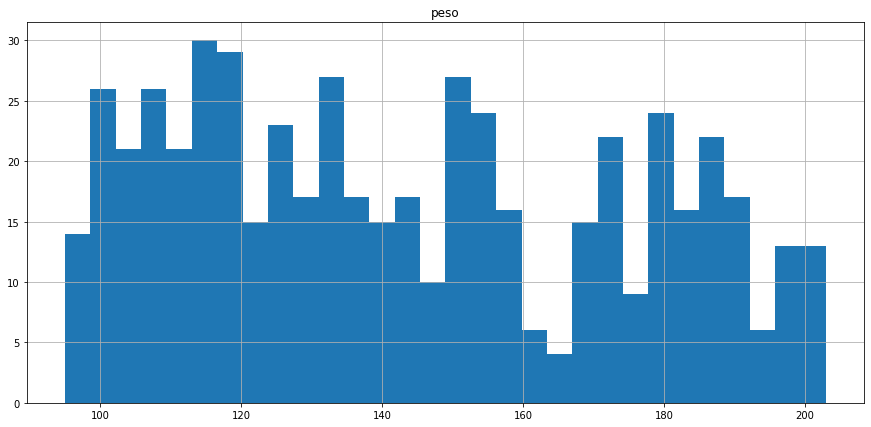

In [56]:
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

**5: Qual o valor do WCSS para o quarto cluster? (utilize random_state=0)?**

In [57]:
wcss_clientes[3]

73809.93553059456

In [58]:
for i in range(len(wcss_clientes)):
  print(f'Cluster:', i , '- Valor do wcss:', wcss_clientes[i] )

Cluster: 0 - Valor do wcss: 1248240.6686746986
Cluster: 1 - Valor do wcss: 298932.7377352369
Cluster: 2 - Valor do wcss: 127842.60787249672
Cluster: 3 - Valor do wcss: 73809.93553059456
Cluster: 4 - Valor do wcss: 49068.8738718445
Cluster: 5 - Valor do wcss: 34064.50002100837
Cluster: 6 - Valor do wcss: 25079.92393550797
Cluster: 7 - Valor do wcss: 20378.05126656164
Cluster: 8 - Valor do wcss: 16003.657266380145
Cluster: 9 - Valor do wcss: 13385.38391038145


**6: Qual o valor do WCSS para o número de clusters = 5? (Utilize random_state=0)**

In [59]:
wcss_clientes[5]

34064.50002100837

**7: São exemplos de aprendizado supervisionado:**

Nenhuma das opções.

**8: É uma vantagem do processamento em lote:**

Aumenta o processamento das informações de forma massiva, trabalhando com
a execução de apenas uma vez o software que processa um grande volume de
dados.

**9: Qual o valor do centroide para o grupo de baixo risco? Leve em consideração as variáveis
na seguinte sequência: peso e colesterol.**

In [60]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters[2]

array([106.90697674, 119.57364341])

**10: Qual a média de idades para o cluster de baixo risco?**

In [61]:
cluster_clientes.groupby('cluster_risco')['idade'].mean()

cluster_risco
Alto risco              43.204225
Baixo risco             43.139535
Moderado Alto risco     42.716981
Moderado Baixo risco    42.347107
Name: idade, dtype: float64

**11: Qual o valor mínimo do colesterol coletado para o grupo de Alto Risco?**

In [62]:
cluster_clientes.groupby('cluster_risco')['colesterol'].min()

cluster_risco
Alto risco              204
Baixo risco             102
Moderado Alto risco     168
Moderado Baixo risco    138
Name: colesterol, dtype: int64

**12: Qual o peso máximo presente no cluster de baixo risco?**

In [63]:
cluster_clientes.groupby('cluster_risco')['peso'].max()

cluster_risco
Alto risco              203.0
Baixo risco             118.0
Moderado Alto risco     169.0
Moderado Baixo risco    142.0
Name: peso, dtype: float64

**13: Qual a melhor representação para o agrupamento dos clusters? Leve em consideração x
como colesterol e y como peso.**


In [64]:
grafico = px.scatter(x = base_completa ['colesterol'], 
                            y = base_completa ['peso'],
                            color= base_completa['cluster'])
grafico_centroide = px.scatter(y = centroides_clusters [:,0], x= centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_clientes = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_clientes.show()

**14: Qual a média dos pesos para o grupo de risco moderado baixo?**

In [65]:
cluster_clientes.groupby('cluster_risco')['peso'].mean()

cluster_risco
Alto risco              184.323944
Baixo risco             106.906977
Moderado Alto risco     152.320755
Moderado Baixo risco    127.570248
Name: peso, dtype: float64

**15: Responda a alternativa CORRETA:**

FALSO: O grupo de baixo risco possui 76 pessoas do gênero feminino.

In [66]:
cluster_clientes.query('cluster_risco == "Baixo risco" & genero == "Feminino"').count()

id_cliente       58
peso             58
colesterol       58
genero           58
id_estado        58
estado           58
sigla_estado     58
pais             58
idade            58
cluster          58
cluster_risco    58
dtype: int64

**VERDADEIRO**: O grupo de alto risco possui média maior de colesterol para o gênero feminino em comparação ao gênero masculino.


In [67]:
cluster_clientes.query('cluster_risco == "Alto risco" & genero == "Feminino"').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id_cliente    268.883333
peso          185.983333
colesterol    220.650000
id_estado      12.533333
idade          41.400000
cluster         0.000000
dtype: float64

In [68]:
cluster_clientes.query('cluster_risco == "Alto risco" & genero == "Masculino"').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id_cliente    272.109756
peso          183.109756
colesterol    217.768293
id_estado      13.219512
idade          44.524390
cluster         0.000000
dtype: float64

**NÃO SOUBE RESPONDER**:O desvio padrão para o grupo de risco moderado-alto é de 9.19 para o gênero feminino.

 
